# Paso 3: Variables de entorno

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


# Paso 4: Inicializar la biblioteca Spotipy

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

# Paso 5: Realizar solicitudes a la API

In [5]:
artist_id = "5MmVJVhhYKQ86izuGHzJYA"

top_tracks = spotify.artist_top_tracks(artist_id)

tracks = []
for track in top_tracks['tracks']:
    tracks.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })

print(tracks)


[{'name': 'Grace Kelly', 'popularity': 75, 'duration_min': 3.1288833333333335}, {'name': 'Relax, Take It Easy', 'popularity': 71, 'duration_min': 4.5}, {'name': 'Happy Ending', 'popularity': 67, 'duration_min': 4.5633333333333335}, {'name': 'Love Today', 'popularity': 64, 'duration_min': 3.91955}, {'name': 'Big Girl (You Are Beautiful)', 'popularity': 61, 'duration_min': 4.133333333333334}, {'name': 'Popular Song', 'popularity': 59, 'duration_min': 3.34355}, {'name': 'Elle me dit', 'popularity': 55, 'duration_min': 3.61555}, {'name': 'Lollipop', 'popularity': 61, 'duration_min': 3.058883333333333}, {'name': 'Relax, Take It Easy', 'popularity': 34, 'duration_min': 3.7544333333333335}, {'name': 'We Are Golden', 'popularity': 55, 'duration_min': 3.9673333333333334}]


# Paso 6: Transformar a Pandas DataFrame

In [6]:
tracks_df = pd.DataFrame(tracks)

print(tracks_df.head())

                           name  popularity  duration_min
0                   Grace Kelly          75      3.128883
1           Relax, Take It Easy          71      4.500000
2                  Happy Ending          67      4.563333
3                    Love Today          64      3.919550
4  Big Girl (You Are Beautiful)          61      4.133333


# Paso 7: Analizar relación estadística

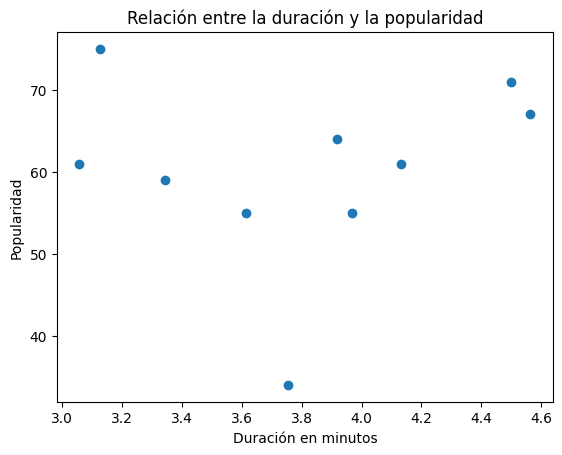

In [7]:
import matplotlib.pyplot as plt
plt.scatter(tracks_df["duration_min"], tracks_df["popularity"])
plt.xlabel('Duración en minutos')
plt.ylabel('Popularidad')
plt.title('Relación entre la duración y la popularidad')
plt.show()


Para las canciones más populares de Mika, no parece existir ningún tipo de correlación entre la duración de la canción y su popularidad: una canción que dura poco más de 3min es casi tan popular como una canción que dura aproximadamente 4 minutos y medio.